# 1. Importación de Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Lectura de los datos

In [ ]:
#Url del github
url = 'https://github.com/Meligar/ML1_Proyecto_Final/raw/e6c36bef28a1c52be9a0207e0806cbf233ad989d/data/german_credit_data_original.csv'

# Leer el archivo CSV en un DataFrame
df_original = pd.read_csv(url,sep=';')

In [ ]:
df_original.head(3)

,EstadoCuenta,Plazo,HistoriaCrediticia,PropositoCredito,MontoCredito,SaldoAhorroOBonos,TiempoEmpleoActual,TasaPago,GeneroYEstadoCivil,CodeudorGarante,...,Activos,Edad,MediosPago,TipoVivienda,CantidadCreditosExistentes,Ocupacion,PersonasACargo,TieneTelefono,TrabajadorExtranjero,clasificacion
0,... < 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
2,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [ ]:
#Url del github
url = 'https://github.com/Meligar/ML1_Proyecto_Final/raw/acdb48329f01b66c7f12a7c2deaf811ad030d4ea/data/german_credit_data.csv'

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(url,sep=';')

In [ ]:
df.head(3)

,EstadoCuenta,Plazo,HistoriaCrediticia,PropositoCredito,MontoCredito,SaldoAhorroOBonos,TiempoEmpleoActual,TasaPago,GeneroYEstadoCivil,CodeudorGarante,...,Activos,Edad,MediosPago,TipoVivienda,CantidadCreditosExistentes,Ocupacion,PersonasACargo,TieneTelefono,TrabajadorExtranjero,clasificacion
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
2,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# 3. Análisis preliminar de los datos

Espacio para realizar el análisis descriptivo.

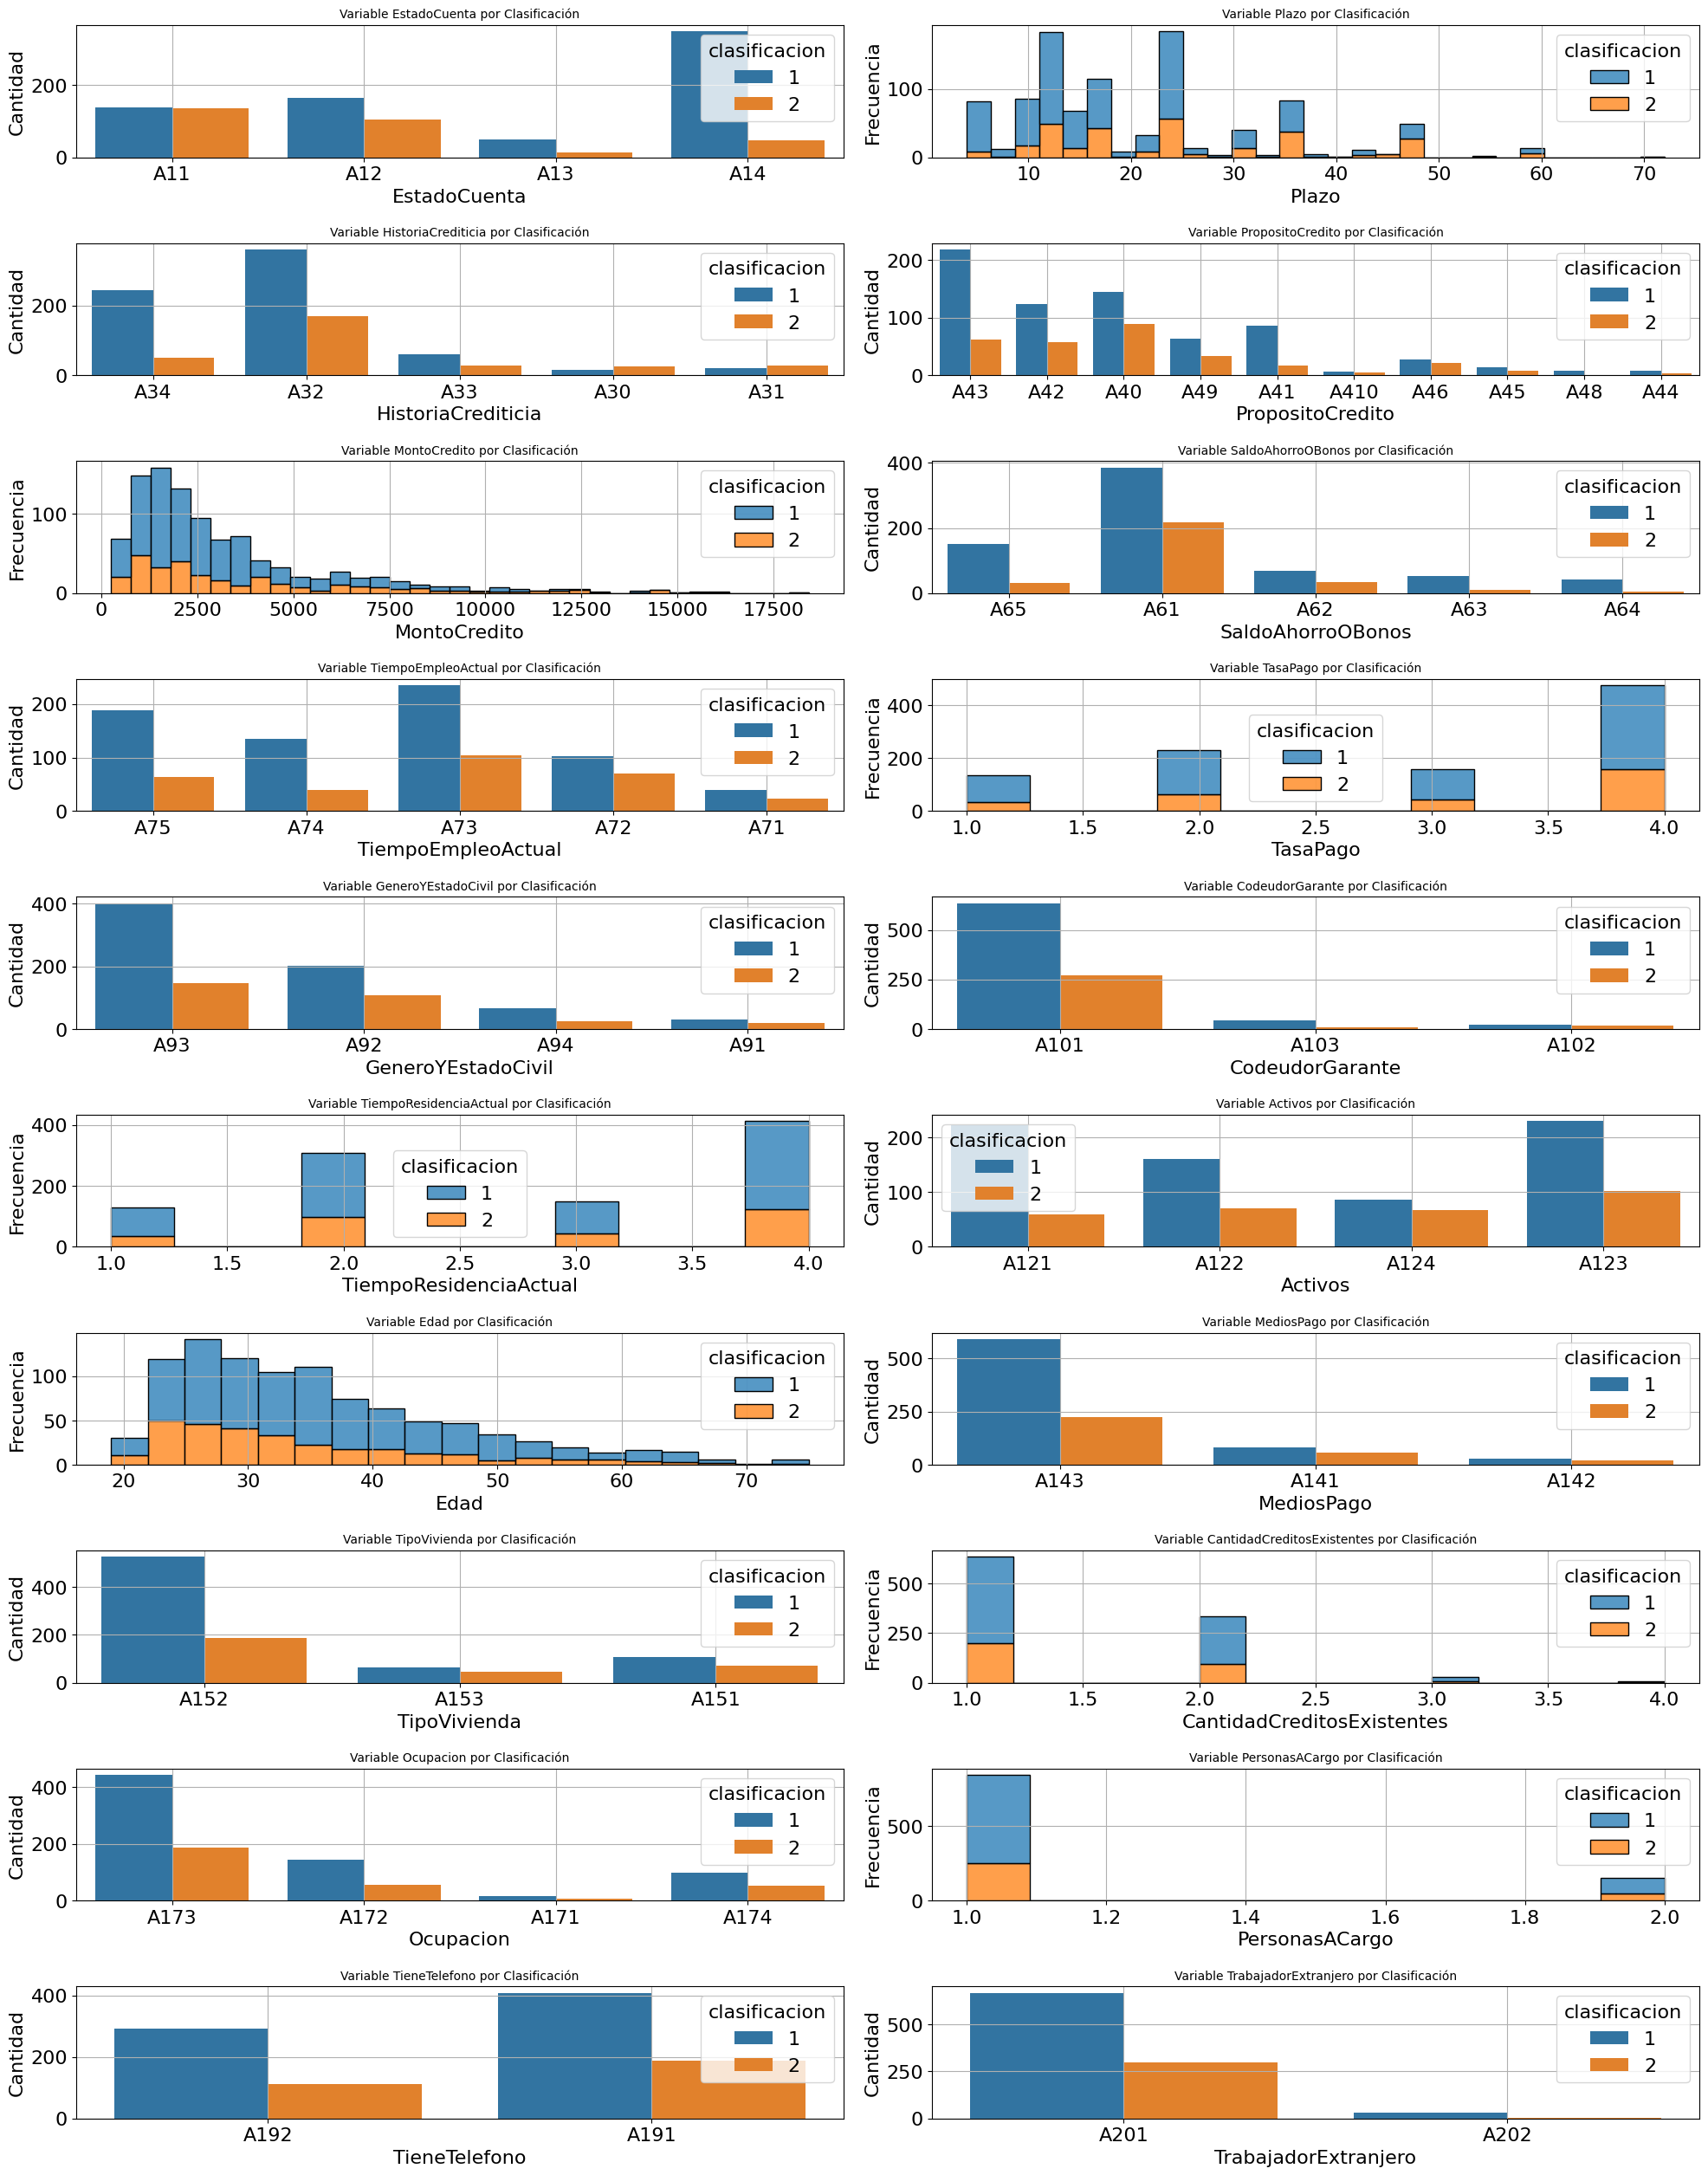

In [ ]:
# variables del dataframe
variables = df.columns.tolist()  # Obtener todas las columnas como una lista

# Eliminar la variable 'clasificacion' de la lista de variables
if 'clasificacion' in variables:
    variables.remove('clasificacion')

# Crear una figura grande para acomodar todos los subplots
fig, axes = plt.subplots(20, 2, figsize=(20, 50))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar a través de las variables y crear un countplot para cada una
for i, var in enumerate(variables):
    if df[var].dtype == 'object': #Para variables categoricas
        sns.countplot(data=df, x=var, hue='clasificacion', palette='tab10', ax=axes[i])
        axes[i].set_title(f'Variable {var} por Clasificación', fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Cantidad")
    else:  # Para variables numéricas
        sns.histplot(data=df, x=var, hue='clasificacion', multiple="stack", palette='tab10', ax=axes[i])
        axes[i].set_title(f'Variable {var} por Clasificación', fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True)

# Eliminar los subplots vacíos si el número de variables no es múltiplo de num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


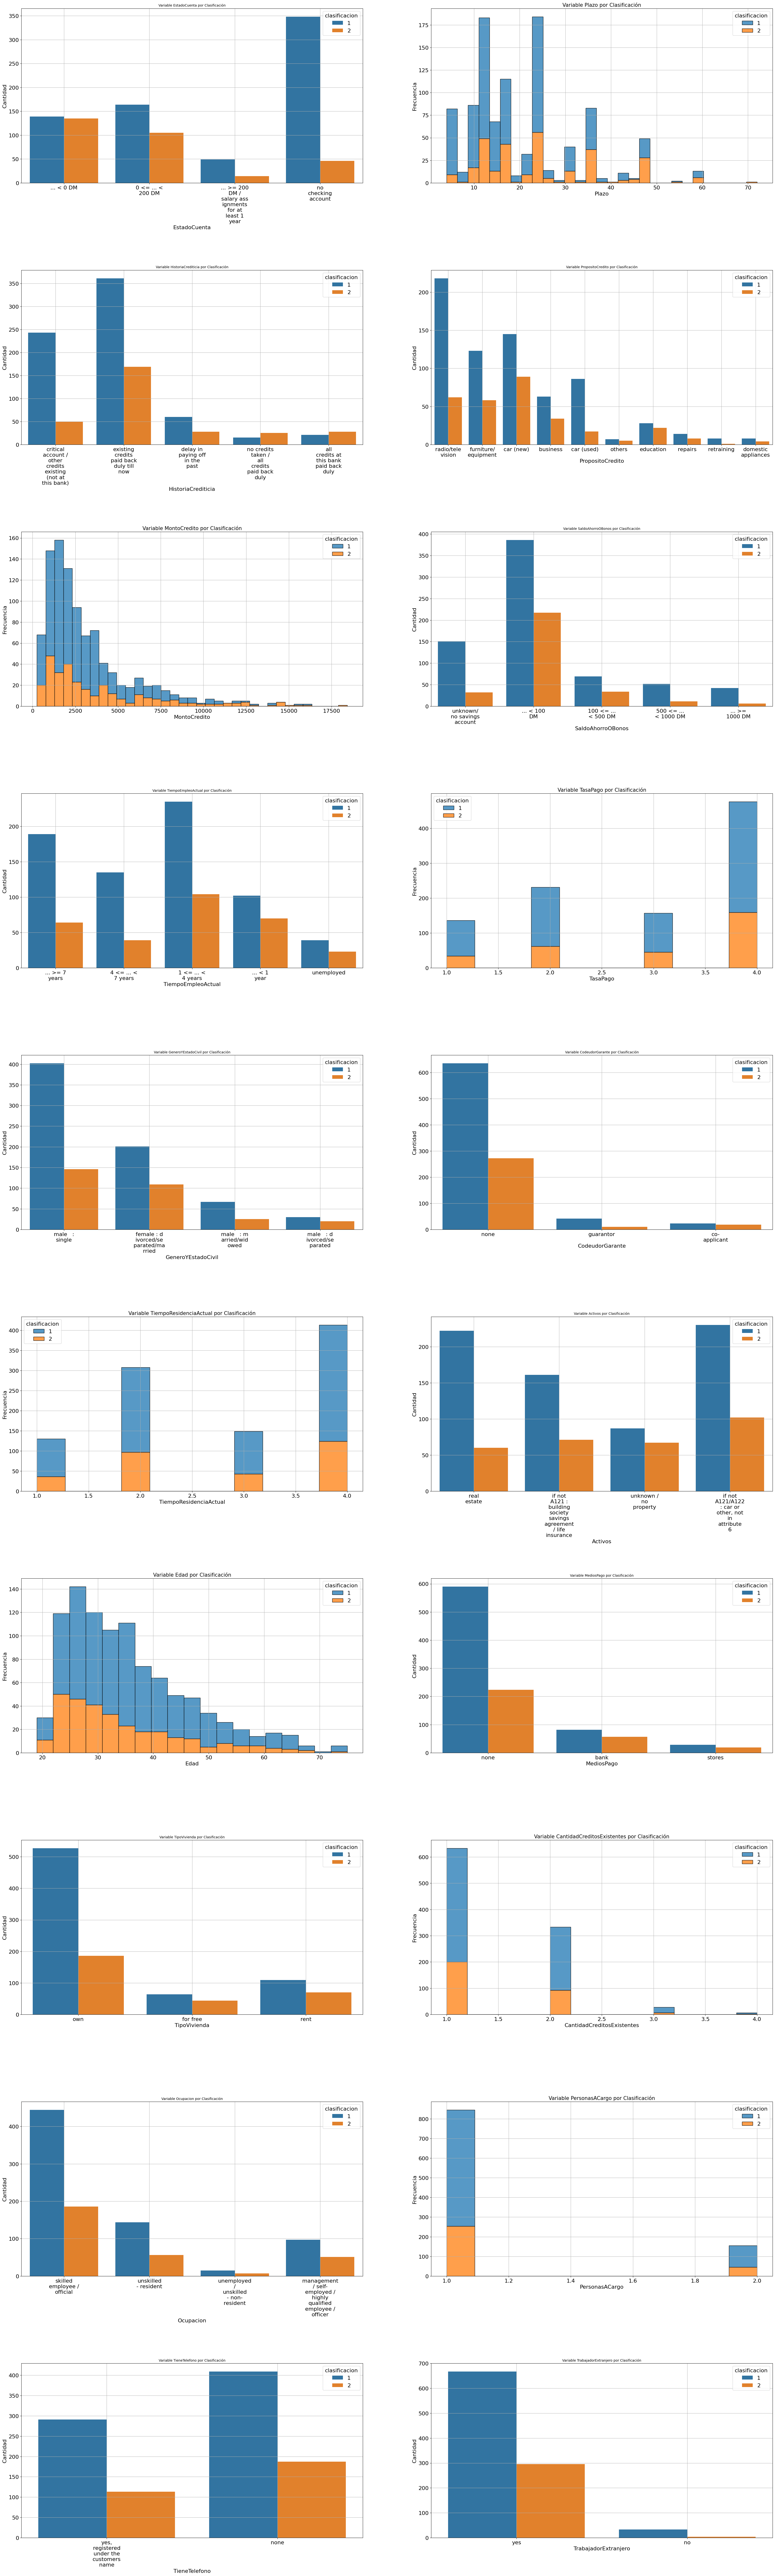

In [ ]:
# variables del dataframe
variables = df_original.columns.tolist()  # Obtener todas las columnas como una lista

# Eliminar la variable 'clasificacion' de la lista de variables
if 'clasificacion' in variables:
    variables.remove('clasificacion')

# Crear una figura grande para acomodar todos los subplots
fig, axes = plt.subplots(10, 2, figsize=(40, 120))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Función para ajustar etiquetas largas
def wrap_labels(ax, max_char=10):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append('\n'.join(textwrap.wrap(text, max_char)))
    ax.set_xticklabels(labels)

# Iterar a través de las variables y crear un countplot para cada una
for i, var in enumerate(variables):
    if df_original[var].dtype == 'object': #Para variables categoricas
        sns.countplot(data=df_original, x=var, hue='clasificacion', palette='tab10', ax=axes[i])
        axes[i].set_title(f'Variable {var} por Clasificación', fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Cantidad")

    else:  # Para variables numéricas
        sns.histplot(data=df_original, x=var, hue='clasificacion', multiple="stack", palette='tab10', ax=axes[i])
        axes[i].set_title(f'Variable {var} por Clasificación', fontsize=15)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frecuencia")

    axes[i].grid(True)
    wrap_labels(axes[i])

# Eliminar los subplots vacíos si el número de variables no es múltiplo de num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.subplots_adjust(hspace=0.5, bottom=0.01)

plt.show()

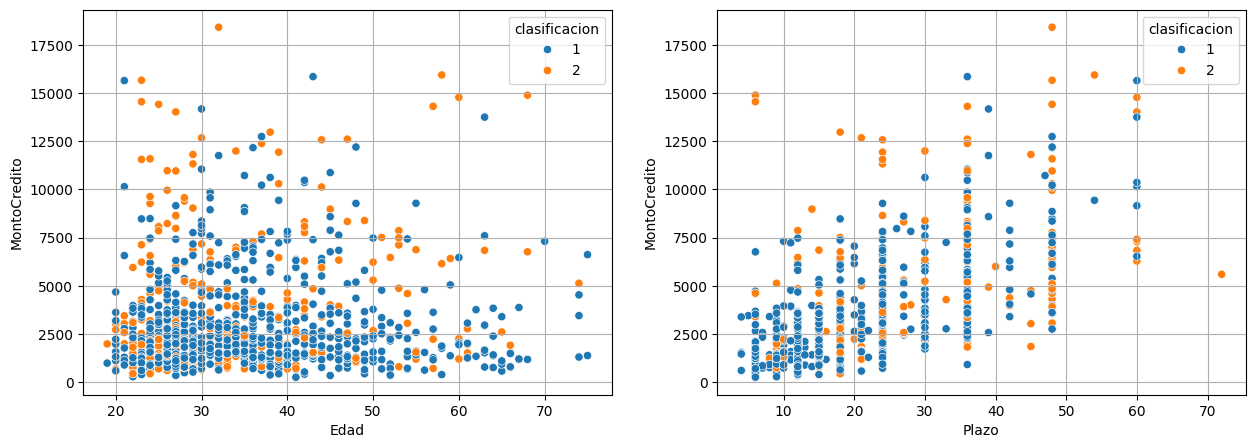

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(data=df, x='Edad', y='MontoCredito', hue='clasificacion', palette='tab10', ax=axes[0])
sns.scatterplot(data=df, x='Plazo', y='MontoCredito', hue='clasificacion', palette='tab10', ax=axes[1])

# Aplicar la grilla a cada gráfico
axes[0].grid(True)
axes[1].grid(True)

# Mostrar la figura
plt.show()

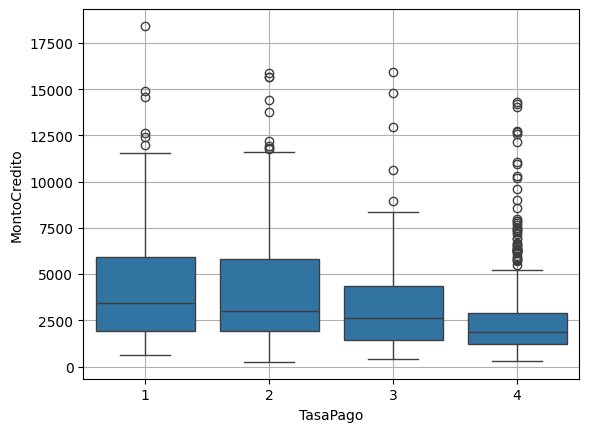

In [ ]:
sns.boxplot(x='TasaPago', y='MontoCredito', data=df)
plt.grid()
plt.show()

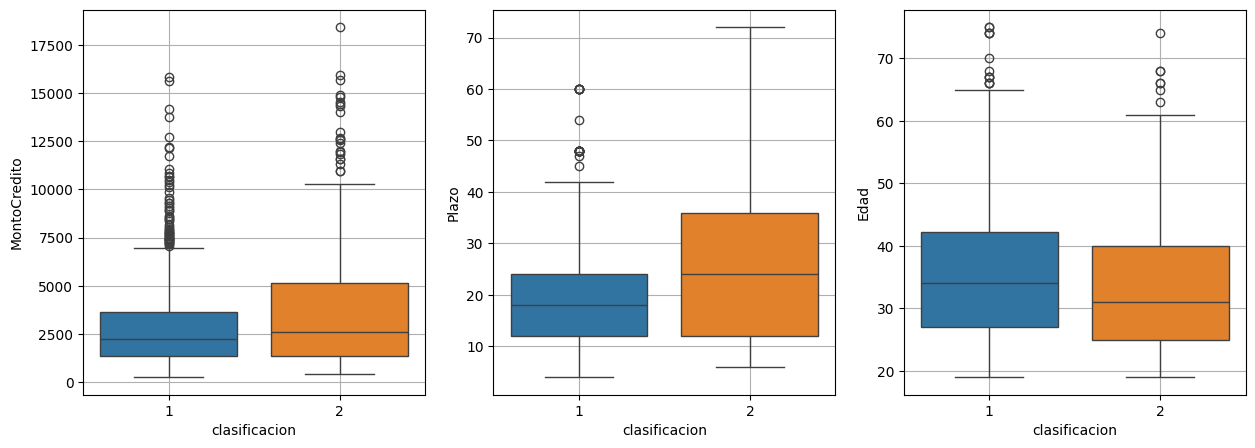

In [ ]:
# Crear la figura y los ejes para los subplots
f, axes = plt.subplots(1, 3,figsize=(15,5))

# Definir una paleta de colores personalizada para el boxplot
custom_palette = {'1': '#1f77b4', '2': '#ff7f0e'}  # Ajusta según tus categorías y colores

sns.boxplot(x='clasificacion', y='MontoCredito', data=df, palette=custom_palette, ax=axes[0])
sns.boxplot(x='clasificacion', y='Plazo', data=df, palette=custom_palette, ax=axes[1])
sns.boxplot(x='clasificacion', y='Edad', data=df, palette=custom_palette, ax=axes[2])

# Aplicar la grilla a cada gráfico
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

# Mostrar la figura
plt.show()

# 4. División de los datos

Antes de realizar el preprocesamiento de los datos, es de nuestro interés dividirlos en 'X' (variables predictoras) y 'y' (variable de respuesta).


In [ ]:
X = df.drop(columns=['clasificacion'])
y = df['clasificacion']

# 5. Preprocesamiento de los datos

## 5.1. Variable de respuesta 'y'

Recordemos que la variable de respuesta 'y', llamada anteriormente 'clasificacion', toma dos valores:

1.   Bueno. Es decir, que el usuario tiene una baja probabilidad de incumplir con la obligación financiera.
2.   Malo. Es decir, que el usuario tiene una baja probabilidad de incumplir con la obligación financiera.

Procedemos a transformar los valores de esta variable, convirtiendo los valores de 1 en 0, y los valores de 2 en 1.

In [ ]:
y = y.replace({1: 0, 2: 1})

In [ ]:
y.value_counts()

clasificacion
0    700
1    300
Name: count, dtype: int64

Como observamos, tenemos 700 registros clasificados como "cumplimiento del crédito", y 300 registros clasificados como "incumplimiento del crédito".

## 5.2. Variables predictoras 'X'

In [ ]:
var_numeric_df = X.select_dtypes(include=['number']).columns
var_numeric_df=list(var_numeric_df)
var_numeric_df

['Plazo',
 'MontoCredito',
 'TasaPago',
 'TiempoResidenciaActual',
 'Edad',
 'CantidadCreditosExistentes',
 'PersonasACargo']

In [ ]:
def show(X):
  for i in X.columns[0:]:
    if i not in var_numeric_df:
        print("Variable: {} {}".format(i,X[i].unique()))

show(X)

Variable: EstadoCuenta ['A11' 'A12' 'A13' 'A14']
Variable: HistoriaCrediticia ['A34' 'A32' 'A33' 'A30' 'A31']
Variable: PropositoCredito ['A43' 'A42' 'A40' 'A49' 'A41' 'A410' 'A46' 'A45' 'A48' 'A44']
Variable: SaldoAhorroOBonos ['A65' 'A61' 'A62' 'A63' 'A64']
Variable: TiempoEmpleoActual ['A75' 'A74' 'A73' 'A72' 'A71']
Variable: GeneroYEstadoCivil ['A93' 'A92' 'A94' 'A91']
Variable: CodeudorGarante ['A101' 'A103' 'A102']
Variable: Activos ['A121' 'A122' 'A124' 'A123']
Variable: MediosPago ['A143' 'A141' 'A142']
Variable: TipoVivienda ['A152' 'A153' 'A151']
Variable: Ocupacion ['A173' 'A172' 'A171' 'A174']
Variable: TieneTelefono ['A192' 'A191']
Variable: TrabajadorExtranjero ['A201' 'A202']


In [ ]:
ordinal_variables_categories = [['A14','A11','A12','A13'],         # EstadoCuenta
                                ['A65','A61','A62','A63','A64'],   # SaldoAhorroOBonos
                                ['A71','A72','A73','A74','A75'],   # TiempoEmpleoActual
                                ['A124','A123','A122','A121'],     # Activos
                                ]

ordinal_variables = ['EstadoCuenta','SaldoAhorroOBonos','TiempoEmpleoActual','Activos']

label_variables = ['HistoriaCrediticia','PropositoCredito','GeneroYEstadoCivil','CodeudorGarante','MediosPago','TipoVivienda','Ocupacion']

onehot_variables = ['TieneTelefono','TrabajadorExtranjero']

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=ordinal_variables_categories)
ordinal_encoder_array = ordinal_encoder.fit_transform(X[ordinal_variables])
ordinal_encoder_df = pd.DataFrame(ordinal_encoder_array, columns=ordinal_variables)

label_encoder = LabelEncoder()
label_encoder_df = pd.DataFrame()
for var in label_variables:
    label_encoder_df[var] = label_encoder.fit_transform(X[var])

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoder_array = onehot_encoder.fit_transform(X[onehot_variables])
onehot_encoder_df = pd.DataFrame(onehot_encoder_array, columns=onehot_variables)

numeric_df = X[var_numeric_df]

In [ ]:
X_encoded = pd.concat([numeric_df, ordinal_encoder_df, label_encoder_df, onehot_encoder_df], axis=1)

In [ ]:
X_encoded

,Plazo,MontoCredito,TasaPago,TiempoResidenciaActual,Edad,CantidadCreditosExistentes,PersonasACargo,EstadoCuenta,SaldoAhorroOBonos,TiempoEmpleoActual,Activos,HistoriaCrediticia,PropositoCredito,GeneroYEstadoCivil,CodeudorGarante,MediosPago,TipoVivienda,Ocupacion,TieneTelefono,TrabajadorExtranjero
0,6,1169,4,4,67,2,1,1.0,0.0,4.0,3.0,4,4,2,0,2,1,2,1.0,0.0
1,42,7882,2,4,45,1,2,1.0,1.0,3.0,2.0,2,3,2,2,2,2,2,0.0,0.0
2,24,4870,3,4,53,2,2,1.0,1.0,2.0,0.0,3,0,2,0,2,2,2,0.0,0.0
3,48,4308,3,4,24,1,1,1.0,1.0,1.0,2.0,2,9,1,0,2,0,2,0.0,0.0
4,24,1199,4,4,60,2,1,1.0,1.0,4.0,1.0,4,0,2,0,2,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,3565,2,1,37,2,2,0.0,0.0,1.0,2.0,4,7,2,0,2,1,1,0.0,0.0
996,15,1569,4,4,34,1,2,0.0,2.0,4.0,1.0,1,4,2,0,0,1,1,0.0,0.0
997,12,2390,4,3,50,1,1,0.0,0.0,4.0,1.0,2,0,2,0,2,1,2,1.0,0.0
998,12,1736,3,4,31,1,1,0.0,1.0,3.0,3.0,2,3,1,0,2,1,1,0.0,0.0


# 6. Partición de muestras y scaling de los datos

También es importante dividir los datos en train y test. En este caso particular, utilizaremos el 20% de las observaciones en la muestra de test.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size = 0.2)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Finalmente, procedemos a escalar los datos de train y test utilizando el método StandardScaler.


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Implementación de modelos

## 7.1. Regresión logística

### 7.1.1. Ajuste del modelo

In [ ]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

LogisticRegression()

### 7.1.2. Evaluación del modelo

#### 7.1.2.1. Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
ypred = reg_log.predict(X_test)
y_pred_proba = reg_log.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, ypred)

print ("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[120  13]
 [ 43  24]]


También podemos representar esta matriz a través de un mapa de calor, como sigue:

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

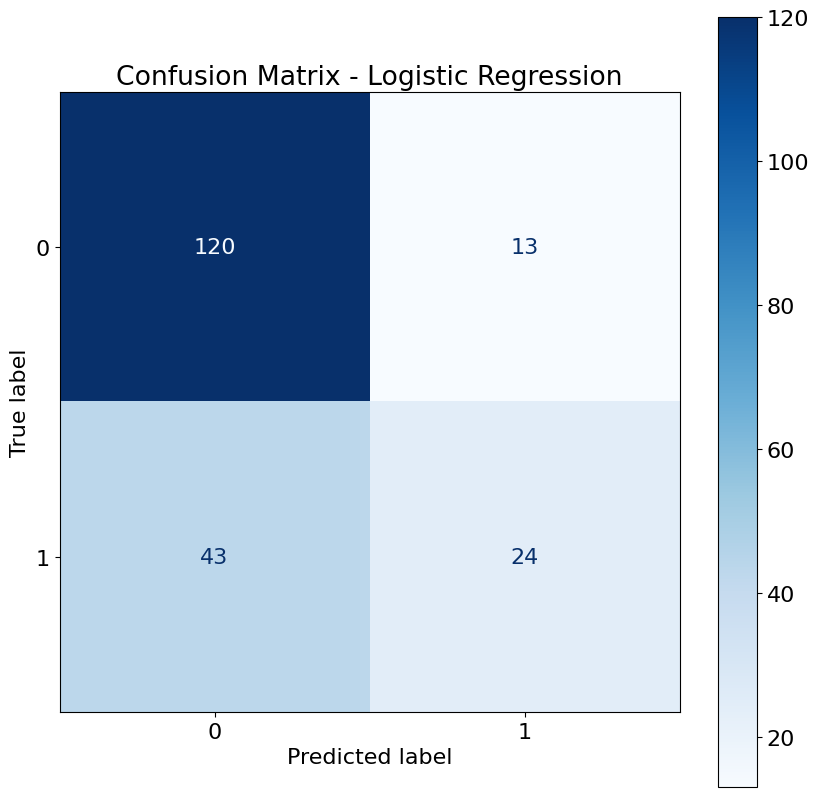

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(reg_log,
                                             X_test,
                                             y_test,
                                             display_labels=reg_log.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

#### 7.1.2.2. Métricas de desempeño

In [ ]:
from sklearn.metrics import classification_report

Calculamos las diferentes métricas del modelo, como sigue:

In [ ]:
target_names = ['Good', 'Bad']
print(classification_report(y_test, ypred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.74      0.90      0.81       133
         Bad       0.65      0.36      0.46        67

    accuracy                           0.72       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.71      0.72      0.69       200



In [ ]:
error_reg_log=0
for i in range(0,len(y_test)):
    if(y_test[i]!=ypred[i]):
        error_reg_log+=1/len(y_test)

print('El error de clasificación para regresión logística en la muestra de test es:')
print(error_reg_log)

El error de clasificación para regresión logística en la muestra de test es:
0.28000000000000014


En general, podemos acceder al valor del Accuracy como sigue:

In [ ]:
accuracy_reg_log = reg_log.score(X_test, y_test)
accuracy_reg_log

0.72

In [ ]:
precision_reg_log = precision_score(y_test, ypred)
print('La precisión para regresión logística en la muestra de test es:')
print(precision_reg_log)

La precisión para regresión logística en la muestra de test es:
0.6486486486486487


También se hace relevante graficar las distintas métricas del modelo en función de distintos thersholds o puntos de corte. Procedemos como sigue:

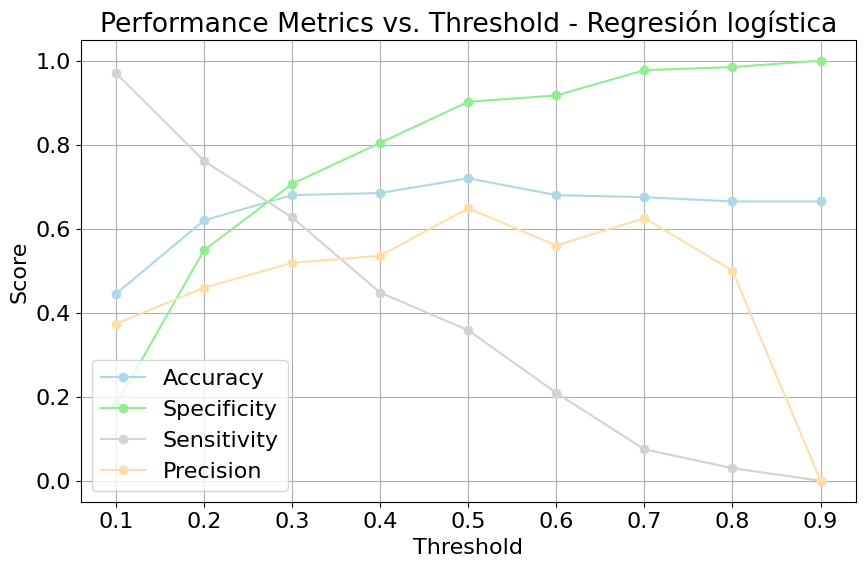

In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)

accuracy_values = []
specificity_values = []
sensitivity_values = []
precision_values = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    accuracy_values.append(accuracy)
    specificity_values.append(specificity)
    sensitivity_values.append(sensitivity)
    precision_values.append(precision)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_values, marker='o', linestyle='-', color='lightblue', label='Accuracy')
plt.plot(thresholds, specificity_values, marker='o', linestyle='-', color='lightgreen', label='Specificity')
plt.plot(thresholds, sensitivity_values, marker='o', linestyle='-', color='lightgray', label='Sensitivity')
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='navajowhite', label='Precision')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold - Regresión logística')
plt.legend()
plt.grid(True)
plt.show()

#### 7.1.2.3. Curva ROC y AUC

In [ ]:
AUC_reg_log = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_reg_log}')

AUC: 0.7197845359667827


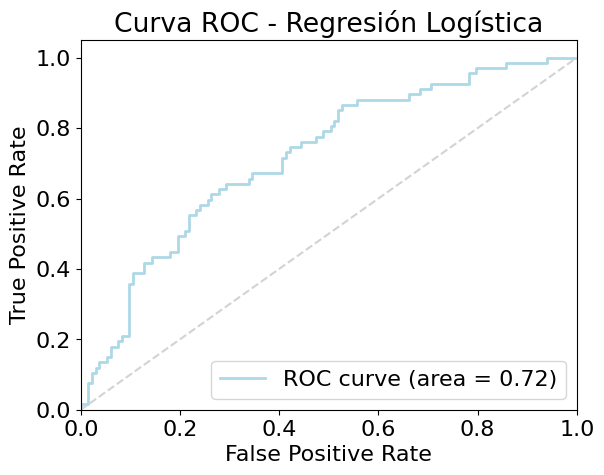

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_reg_log:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

## 7.2. Modelo LDA - Análisis de Discriminante Lineal

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 7.2.1. Ajuste del modelo

In [ ]:
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### 7.2.2. Desempeño del modelo

In [ ]:
prediccionesLDA=clfLDA.predict(X_test)
y_pred_proba = clfLDA.predict_proba(X_test)[:, 1]

#### 7.2.2.1. Métricas de desempeño

In [ ]:
error_LDA=0
for i in range(0,len(y_test)):
    if(y_test[i]!=prediccionesLDA[i]):
        error_LDA+=1/len(y_test)

print('El error de clasificación para LDA en la muestra de test es:')
print(error_LDA)

El error de clasificación para LDA en la muestra de test es:
0.31000000000000016


In [ ]:
accuracy_LDA = clfLDA.score(X_test, y_test)
print('El accuracy para LDA en la muestra de test es:')
print(accuracy_LDA)

El accuracy para LDA en la muestra de test es:
0.69


In [ ]:
precision_LDA = precision_score(y_test, prediccionesLDA)
print('La precisión para LDA en la muestra de test es:')
print(precision_LDA)

La precisión para LDA en la muestra de test es:
0.5609756097560976


#### 7.2.2.2. Curva ROC y AUC

In [ ]:
AUC_LDA = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_LDA}')

AUC: 0.7032880709235776


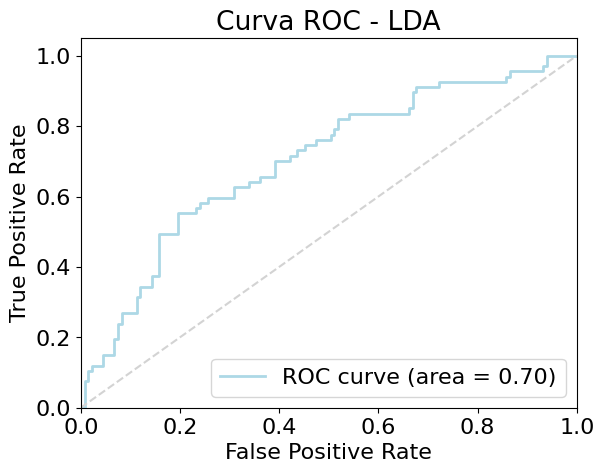

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_LDA:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LDA')
plt.legend(loc="lower right")
plt.show()

## 7.3. Modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

### 7.3.1. Ajuste del modelo

In [ ]:
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)

GaussianNB()

### 7.3.2. Desempeño del modelo

In [ ]:
prediccionesNB=clfNB.predict(X_test)
y_pred_proba = clfNB.predict_proba(X_test)[:, 1]

#### 7.3.2.1. Métricas de desempeño

In [ ]:
error_NB=0
for i in range(0,len(y_test)):
    if(y_test[i]!=prediccionesNB[i]):
        error_NB+=1/len(y_test)

print('El error de clasificación para Naive Bayes en la muestra de test es:')
print(error_NB)

El error de clasificación para Naive Bayes en la muestra de test es:
0.27500000000000013


In [ ]:
accuracy_NB = clfNB.score(X_test, y_test)
print('El accuracy para NB en la muestra de test es:')
print(accuracy_NB)

El accuracy para NB en la muestra de test es:
0.725


In [ ]:
precision_NB = precision_score(y_test, prediccionesNB)
print('La precisión para NB en la muestra de test es:')
print(precision_NB)

La precisión para NB en la muestra de test es:
0.59375


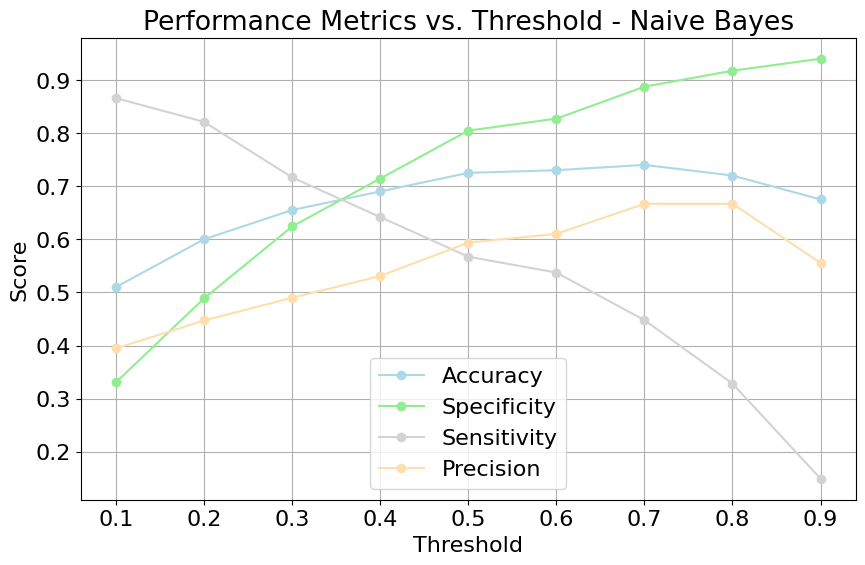

In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)

accuracy_values = []
specificity_values = []
sensitivity_values = []
precision_values = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    accuracy_values.append(accuracy)
    specificity_values.append(specificity)
    sensitivity_values.append(sensitivity)
    precision_values.append(precision)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_values, marker='o', linestyle='-', color='lightblue', label='Accuracy')
plt.plot(thresholds, specificity_values, marker='o', linestyle='-', color='lightgreen', label='Specificity')
plt.plot(thresholds, sensitivity_values, marker='o', linestyle='-', color='lightgray', label='Sensitivity')
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='navajowhite', label='Precision')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

#### 7.3.2.2. Curva ROC

In [ ]:
AUC_NB = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_NB}')

AUC: 0.7308944001795534


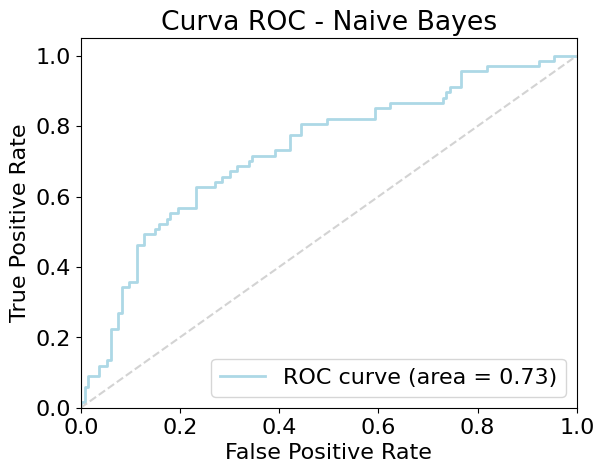

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_NB:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## 7.4. Modelo QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### 7.4.1. Ajuste del modelo



In [ ]:
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
prediccionesQDA=clfQDA.predict(X_test)
y_pred_proba = clfQDA.predict_proba(X_test)[:, 1]

### 7.4.2. Desempeño del modelo

#### 7.4.2.1. Métricas de desempeño


In [ ]:
error_QDA=0
for i in range(0,len(y_test)):
    if(y_test[i]!=prediccionesQDA[i]):
        error_QDA+=1/len(y_test)

print('El error de clasificación para QDA en la muestra de test es:')
print(error_QDA)

El error de clasificación para QDA en la muestra de test es:
0.29500000000000015


In [ ]:
accuracy_QDA = clfQDA.score(X_test, y_test)
print('El accuracy para QDA en la muestra de test es:')
print(accuracy_QDA)

El accuracy para QDA en la muestra de test es:
0.705


In [ ]:
precision_QDA = precision_score(y_test, prediccionesQDA)
print('La precisión para QDA en la muestra de test es:')
print(precision_QDA)

La precisión para QDA en la muestra de test es:
0.5625


#### 7.4.2.2. Curva ROC y AUC


In [ ]:
AUC_QDA = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_QDA}')

AUC: 0.7296599708225788


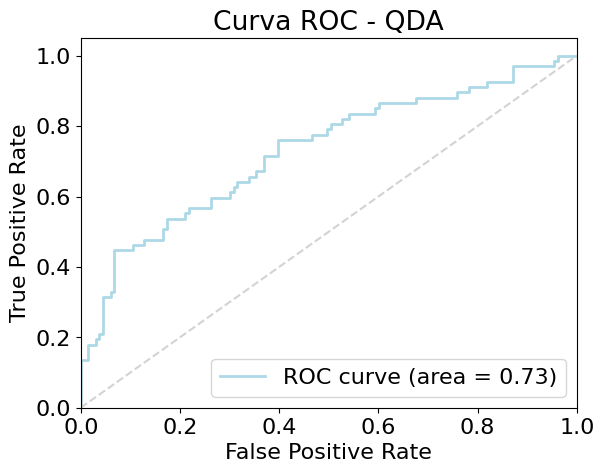

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_QDA:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - QDA')
plt.legend(loc="lower right")
plt.show()

## 7.5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### 7.5.1. Ajuste del modelo

In [ ]:
RF = RandomForestClassifier(random_state = 30)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

### 7.5.2. Desempeño del modelo

In [ ]:
prediccionesRF=RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)[:, 1]

#### 7.5.2.1. Métricas de desempeño

In [ ]:
error_RF=0
for i in range(0,len(y_test)):
    if(y_test[i]!=prediccionesRF[i]):
        error_RF+=1/len(y_test)

print('El error de clasificación para RF en la muestra de test es:')
print(error_RF)

El error de clasificación para RF en la muestra de test es:
0.24000000000000013


In [ ]:
accuracy_RF = RF.score(X_test, y_test)
print('El accuracy para RF en la muestra de test es:')
print(accuracy_RF)

El accuracy para RF en la muestra de test es:
0.76


In [ ]:
precision_RF = precision_score(y_test, prediccionesRF)
print('La precisión para RF en la muestra de test es:')
print(precision_RF)

La precisión para RF en la muestra de test es:
0.7878787878787878


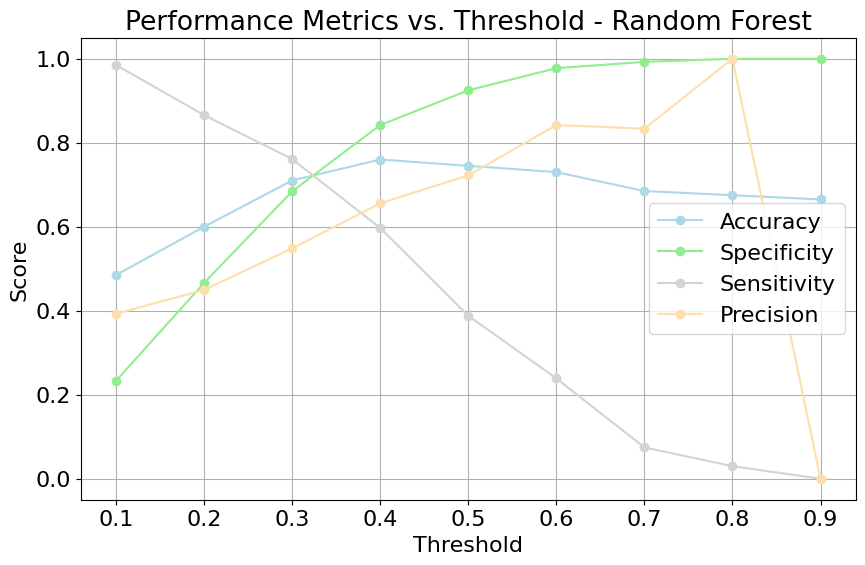

In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)

accuracy_values = []
specificity_values = []
sensitivity_values = []
precision_values = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    accuracy_values.append(accuracy)
    specificity_values.append(specificity)
    sensitivity_values.append(sensitivity)
    precision_values.append(precision)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_values, marker='o', linestyle='-', color='lightblue', label='Accuracy')
plt.plot(thresholds, specificity_values, marker='o', linestyle='-', color='lightgreen', label='Specificity')
plt.plot(thresholds, sensitivity_values, marker='o', linestyle='-', color='lightgray', label='Sensitivity')
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='navajowhite', label='Precision')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

#### 7.5.2.2. Curva ROC y AUC

In [ ]:
AUC_RF = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_RF}')

AUC: 0.800415217147346


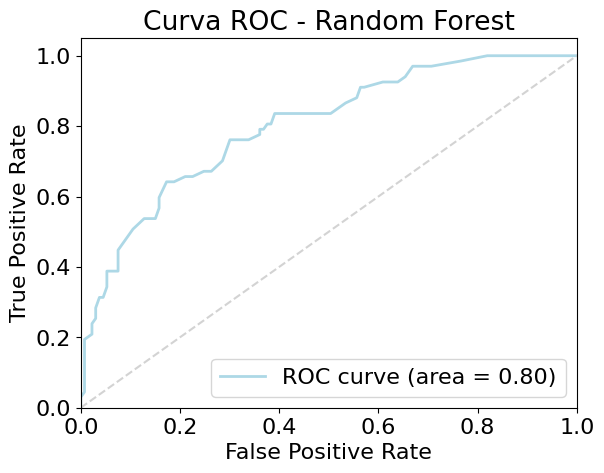

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_RF:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

## 7.6. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

### 7.6.1. Ajuste del modelo

In [ ]:
XGB = XGBClassifier(random_state = 30)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [ ]:
prediccionesXGB=XGB.predict(X_test)
y_pred_proba = XGB.predict_proba(X_test)[:, 1]

### 7.6.2. Desempeño del modelo

##### 7.6.2.1. Métricas de desempeño

In [ ]:
error_XGB=0
for i in range(0,len(y_test)):
    if(y_test[i]!=prediccionesXGB[i]):
        error_XGB+=1/len(y_test)

print('El error de clasificación para RF en la muestra de test es:')
print(error_XGB)

El error de clasificación para RF en la muestra de test es:
0.23000000000000012


In [ ]:
accuracy_XGB = XGB.score(X_test, y_test)
print('El accuracy para XGB en la muestra de test es:')
print(accuracy_XGB)

El accuracy para XGB en la muestra de test es:
0.77


In [ ]:
precision_XGB = precision_score(y_test, prediccionesXGB)
print('La precisión para XGB en la muestra de test es:')
print(precision_XGB)

La precisión para XGB en la muestra de test es:
0.723404255319149


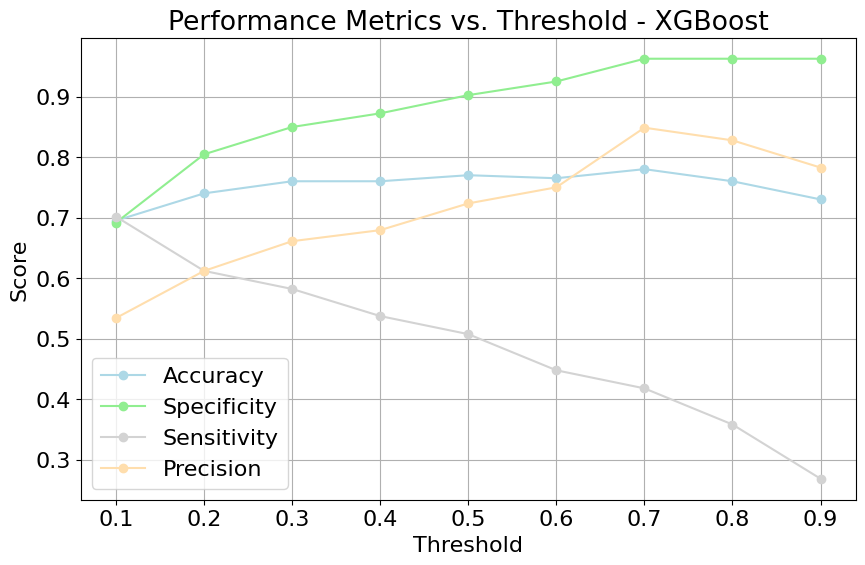

In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)

accuracy_values = []
specificity_values = []
sensitivity_values = []
precision_values = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    accuracy_values.append(accuracy)
    specificity_values.append(specificity)
    sensitivity_values.append(sensitivity)
    precision_values.append(precision)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_values, marker='o', linestyle='-', color='lightblue', label='Accuracy')
plt.plot(thresholds, specificity_values, marker='o', linestyle='-', color='lightgreen', label='Specificity')
plt.plot(thresholds, sensitivity_values, marker='o', linestyle='-', color='lightgray', label='Sensitivity')
plt.plot(thresholds, precision_values, marker='o', linestyle='-', color='navajowhite', label='Precision')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

##### 7.6.2.1. Curva ROC y AUC

In [ ]:
AUC_XGB = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_XGB}')

AUC: 0.7642239928178656


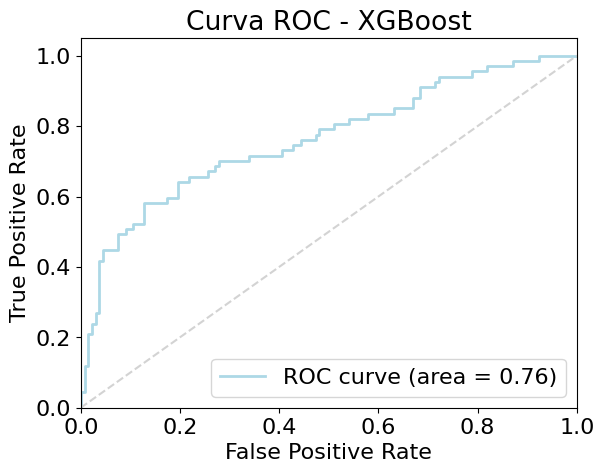

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (area = {AUC_XGB:.2f})')
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

# 8. Comparación de modelos

A continuación, elegiremos el mejor modelo tomando como criterio el accuracy o exactitud de predicción, el error de predicción, la precisión y el AUC.

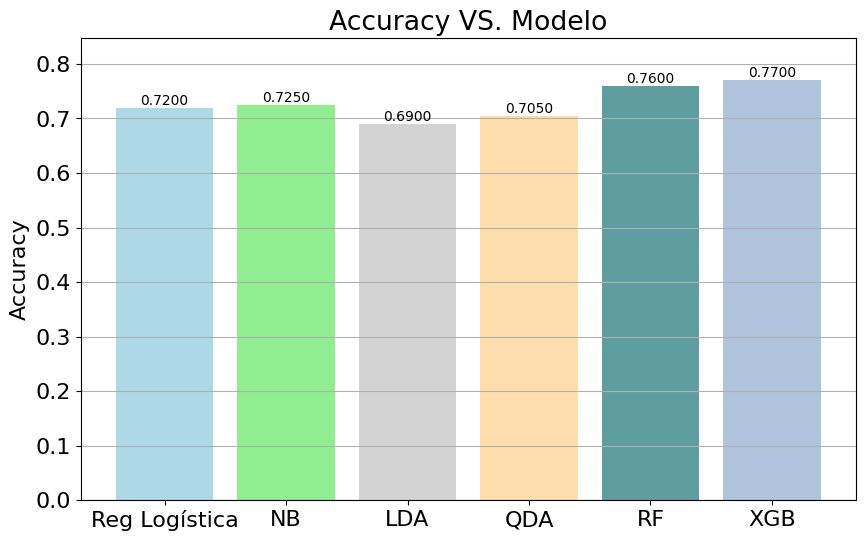

In [ ]:
model_names = ['Reg Logística', 'NB', 'LDA', 'QDA', 'RF', 'XGB']
accuracy = [accuracy_reg_log, accuracy_NB, accuracy_LDA, accuracy_QDA, accuracy_RF, accuracy_XGB]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightgreen', 'lightgray', 'navajowhite', 'cadetblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Accuracy VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

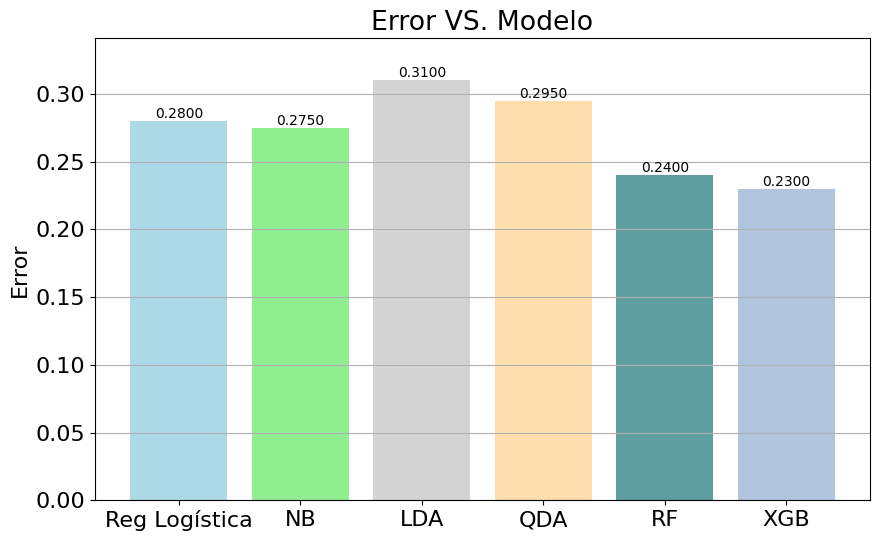

In [ ]:
model_names = ['Reg Logística', 'NB', 'LDA', 'QDA', 'RF', 'XGB']
accuracy = [error_reg_log, error_NB, error_LDA, error_QDA, error_RF, error_XGB]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightgreen', 'lightgray', 'navajowhite', 'cadetblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Error')
plt.title('Error VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

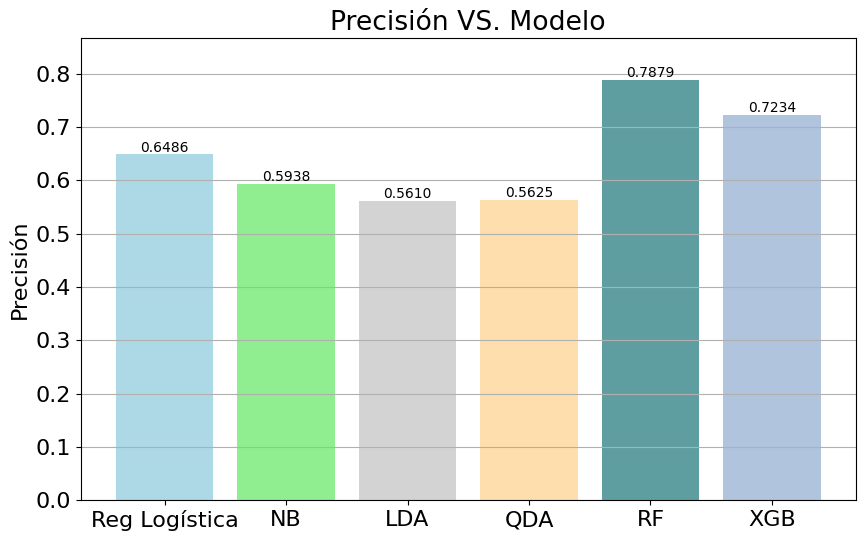

In [ ]:
model_names = ['Reg Logística', 'NB', 'LDA', 'QDA', 'RF', 'XGB']
accuracy = [precision_reg_log, precision_NB, precision_LDA, precision_QDA, precision_RF, precision_XGB]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightgreen', 'lightgray', 'navajowhite', 'cadetblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Precisión')
plt.title('Precisión VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

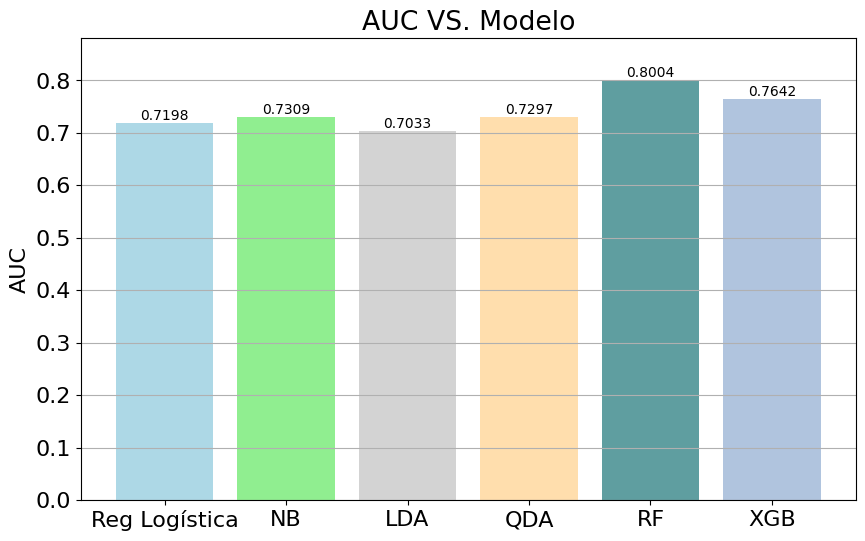

In [ ]:
model_names = ['Reg Logística', 'NB', 'LDA', 'QDA', 'RF', 'XGB']
accuracy = [AUC_reg_log, AUC_NB, AUC_LDA, AUC_QDA, AUC_RF, AUC_XGB]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightgreen', 'lightgray', 'navajowhite', 'cadetblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('AUC')
plt.title('AUC VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

Tal y como observamos, el mejor modelo para este escenario utilizando como criterios el accuracy y error de predicción, es el XGBoost Classifier. Utilizando como criterio el AUC, el modelo ganador es el Random Forest.

# 9. Alternativas: mejoramiento de modelos de ensamblaje

## 9.1. Random Forest mejorado

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Definición de modelo Random Forest para un problema de clasificación
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pd.Series(cross_val_score(clf, X_train, y_train, cv=10)).describe()

count    10.000000
mean      0.762500
std       0.028868
min       0.712500
25%       0.750000
50%       0.756250
75%       0.784375
max       0.812500
dtype: float64

### Calibración de max_depth

**max_depth** en Random Forest controla la profundidad máxima de los árboles en el bosque, limitando la complejidad del modelo y ayudando a prevenir el sobreajuste.

In [ ]:
# Creación de lista de valores para iterar sobre diferentes valores de max_depth
max_depth_range = [1, 2, 5, 10, 15, 20]

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for max_depth in max_depth_range:
    clf = RandomForestClassifier(max_depth = max_depth, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

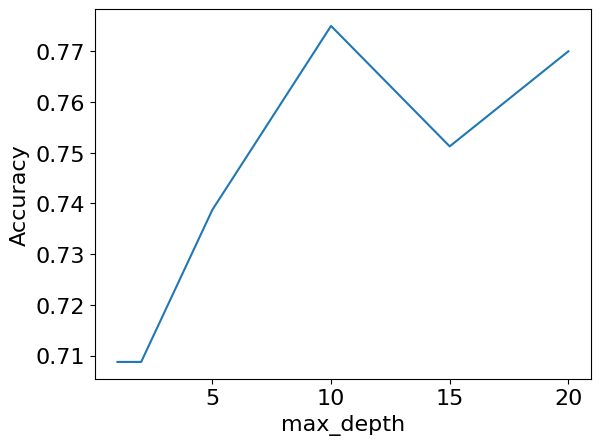

In [ ]:
# Gráfica del desempeño del modelo vs el valor de max_depth
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Tal y como observamos, el mejor valor para el parámetro profundidad es de 10, ya que para este el Accuracy toma su valor máximo.

### Calibración de n_estimators

**n_estimators** es la cantidad de árboles a contruir dentro del bosque aleatorio.

In [ ]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestClassifier(max_depth = 10, n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

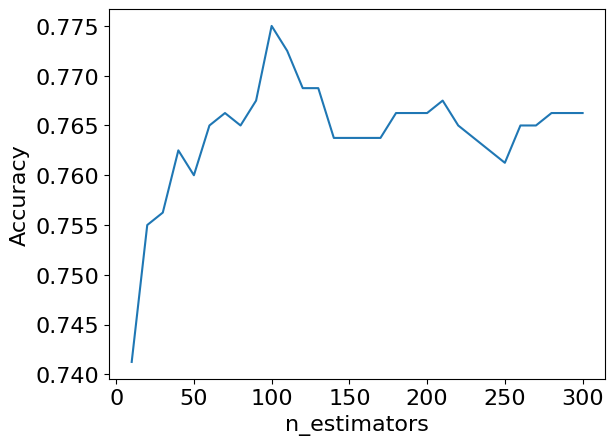

In [ ]:
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Como podemos observar, el valor del Accuracy es máximo cuando n_estimators = 100.

### Calibración de max_features

**max_features** es el número de variables que se deben considerar en cada árbol.

In [ ]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(X.columns)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(max_depth = 10, n_estimators=100, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

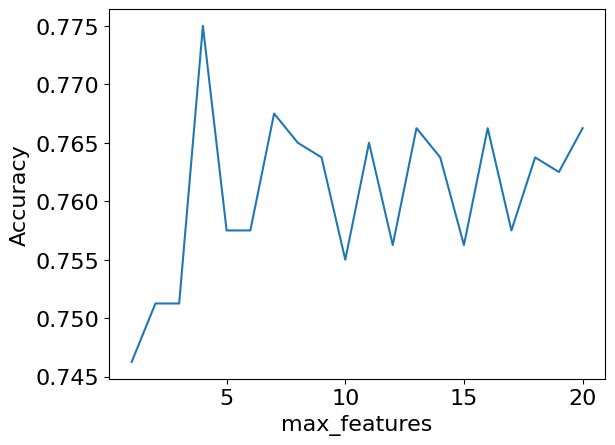

In [ ]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [ ]:
max_features_optimo = feature_range[accuracy_scores.index(max(accuracy_scores))]
max_features_optimo

4

Como podemos observar, el máximo valor del Accuracy lo obtenemos con max_features = 4, el 20% de las variables que estamos analizando en este dataset. Esto tiene sentido ya que el valor de m generalmente se calcula como la raíz cuadrada de p, siendo p el número total de variables.

### Mejor modelo

In [ ]:
clf = RandomForestClassifier(max_depth = 10, n_estimators = 100, max_features = 4, random_state=2, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=4, n_jobs=-1, random_state=2)

In [ ]:
accuracy_RF_mejorado = clf.score(X_test, y_test)
print('El accuracy para RF en la muestra de test es:')
print(accuracy_RF_mejorado)

El accuracy para RF en la muestra de test es:
0.75


In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
AUC_RF_mejorado = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_RF_mejorado}')

AUC: 0.7977780271574458


In [ ]:
# Impresión de resultados de desemepeño del modelo
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
19,TrabajadorExtranjero,0.005038
6,TiempoEmpleoActual,0.014513
14,TipoVivienda,0.018619
18,TieneTelefono,0.021427
5,SaldoAhorroOBonos,0.022942
16,Ocupacion,0.025942
17,PersonasACargo,0.027008
15,CantidadCreditosExistentes,0.027122
13,MediosPago,0.030278
3,PropositoCredito,0.038811


## 9.2. XGBoost mejorado

In [ ]:
# Definición del modelo
XGB = XGBClassifier(random_state=1, n_jobs=-1)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_pred = XGB.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5964912280701754, 0.77)

### 9.2.1. Calibración de learning rate

In [ ]:
learning_rate_range = [0.01, 0.03, 0.05, 0.1, 0.2, 0.3]

accuracy_scores = []

for learning_rate in learning_rate_range:
    XGB = XGBClassifier(learning_rate = learning_rate, random_state=1, n_jobs=-1)
    XGB.fit(X_train, y_train)
    accuracy_scores.append(cross_val_score(XGB, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

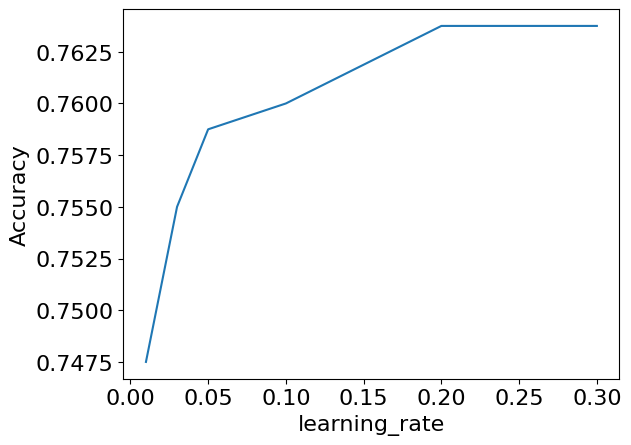

In [ ]:
# Gráfica del desempeño del modelo vs el valor de learning_rate
plt.plot(learning_rate_range, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')

Elegimos un learning_rate de 0.2.

### 9.2.2. Calibración de gamma

In [ ]:
gamma_range = [0.1, 0.2, 0.5, 1, 2, 5, 8, 11, 14, 17]

accuracy_scores = []

for gamma in gamma_range:
    XGB = XGBClassifier(learning_rate = 0.2, gamma = gamma, random_state=1, n_jobs=-1)
    XGB.fit(X_train, y_train)
    accuracy_scores.append(cross_val_score(XGB, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

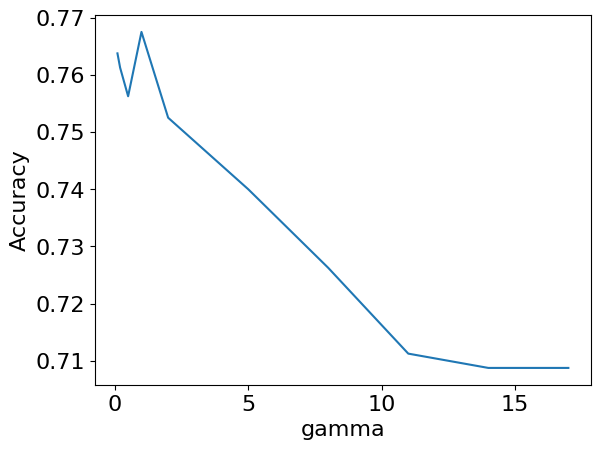

In [ ]:
# Gráfica del desempeño del modelo vs el valor de gamma
plt.plot(gamma_range, accuracy_scores)
plt.xlabel('gamma')
plt.ylabel('Accuracy')

In [ ]:
gamma_optimo = gamma_range[accuracy_scores.index(max(accuracy_scores))]
gamma_optimo

1

Observamos que el máximo valor del accuracy se presenta con un valor de gamma de 1.

### 9.2.3. Calibración de colsample_bytree

In [ ]:
colsample_bytree_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

accuracy_scores = []

for colsample_bytree in colsample_bytree_range:
    XGB = XGBClassifier(learning_rate = 0.2, gamma = 1, colsample_bytree = colsample_bytree, random_state=1, n_jobs=-1)
    XGB.fit(X_train, y_train)
    accuracy_scores.append(cross_val_score(XGB, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

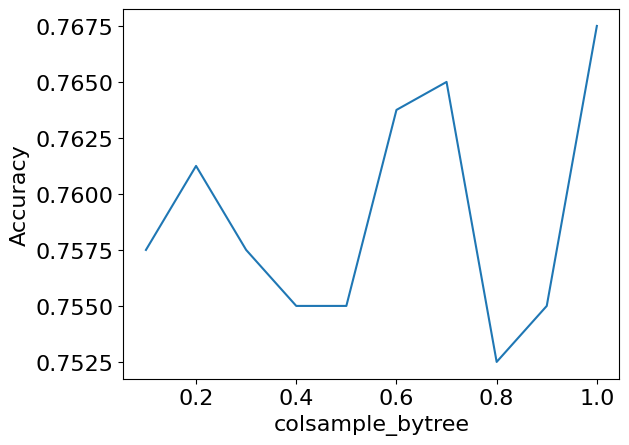

In [ ]:
# Gráfica del desempeño del modelo vs el valor de colsample_bytree
plt.plot(colsample_bytree_range, accuracy_scores)
plt.xlabel('colsample_bytree')
plt.ylabel('Accuracy')

In [ ]:
colsample_bytree_optimo = colsample_bytree_range[accuracy_scores.index(max(accuracy_scores))]
colsample_bytree_optimo

1

Observamos que el máximo valor del accuracy se presenta con un valor de gamma de 1, para el cual se obtiene el mayor valor del accuracy.

### Mejor modelo

In [ ]:
XGB_final = XGBClassifier(learning_rate = 0.2, gamma = 1, colsample_bytree = 1, random_state=1, n_jobs=-1)
XGB_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=1, ...)

In [ ]:
accuracy_XGB_mejorado = XGB_final.score(X_test, y_test)
print('El accuracy para XGB en la muestra de test es:')
print(accuracy_RF_mejorado)

El accuracy para XGB en la muestra de test es:
0.75


In [ ]:
y_pred_proba = XGB_final.predict_proba(X_test)[:, 1]
AUC_XGB_mejorado = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {AUC_XGB_mejorado}')

AUC: 0.779373807653462


In [ ]:
pd.DataFrame({'feature':X.columns, 'importance':XGB_final.feature_importances_}).sort_values('importance')

,feature,importance
19,TrabajadorExtranjero,0.022368
6,TiempoEmpleoActual,0.029712
18,TieneTelefono,0.032394
16,Ocupacion,0.035308
5,SaldoAhorroOBonos,0.035495
13,MediosPago,0.037665
4,MontoCredito,0.038494
2,HistoriaCrediticia,0.040778
1,Plazo,0.043086
9,CodeudorGarante,0.043501


## 9.3. Comparación de modelos mejorados

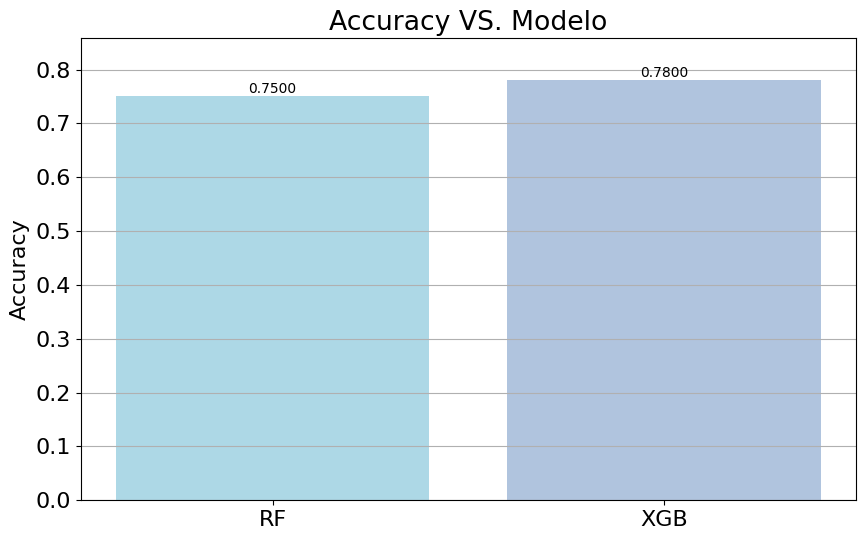

In [ ]:
model_names = ['RF', 'XGB']
accuracy = [accuracy_RF_mejorado, accuracy_XGB_mejorado]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Accuracy VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

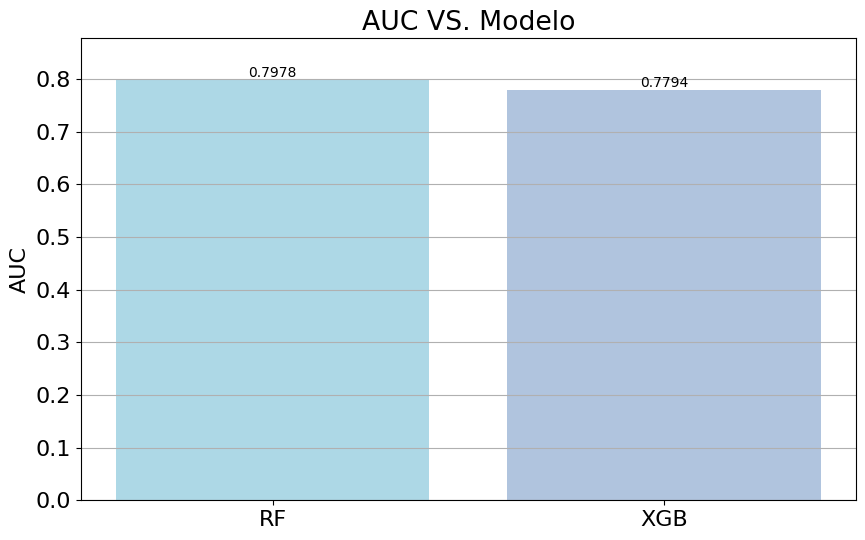

In [ ]:
model_names = ['RF', 'XGB']
accuracy = [AUC_RF_mejorado, AUC_XGB_mejorado]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightsteelblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('AUC')
plt.title('AUC VS. Modelo')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()